## Visualizing College Majors Data
---

A dataset on the job outcomes of students who graduated from college between 2010 and 2012. The original data on job outcomes was released by American Community Survey, which conducts surveys and aggregates the data. FiveThirtyEight cleaned the dataset and released it on their Github repo.

Each row in the dataset represents a different major in college and contains information on gender diversity, employment rates, median salaries, and more. Here are some of the columns in the dataset:

 - Rank - Rank by median earnings (the dataset is ordered by this column).
 - Major_code - Major code.
 - Major - Major description.
 - Major_category - Category of major.
 - Total - Total number of people with major.
 - Sample_size - Sample size (unweighted) of full-time.
 - Men - Male graduates.
 - Women - Female graduates.
 - ShareWomen - Women as share of total.
 - Employed - Number employed.
 - Median - Median salary of full-time, year-round workers.
 - Low_wage_jobs - Number in low-wage service jobs.
 - Full_time - Number employed 35 hours or more.
 - Part_time - Number employed less than 35 hours.

### Initialize Dataset

In [168]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

recent_grads = pd.read_csv('recent-grads.csv')
#recent_grads.iloc[0]

In [2]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [3]:
#recent_grads.tail()

## Explorations
---
- Use a grouped bar plot to compare the number of men with the number of women in each category of majors.
- Use a box plot to explore the distributions of median salaries and unemployment rate.
- Use a hexagonal bin plot to visualize the columns that had dense scatter plots from earlier in the project.

### Comparing number of Men and Women
Compare the number of men with the number of women in each category of majors.

In [133]:
df_salary_top10 = recent_grads.sort_values('Median',ascending=False)[:10]
df_salary_bottom10 = recent_grads.sort_values('Median')[:10]

#### Men-Women grouped barplots for Top 10 Majors

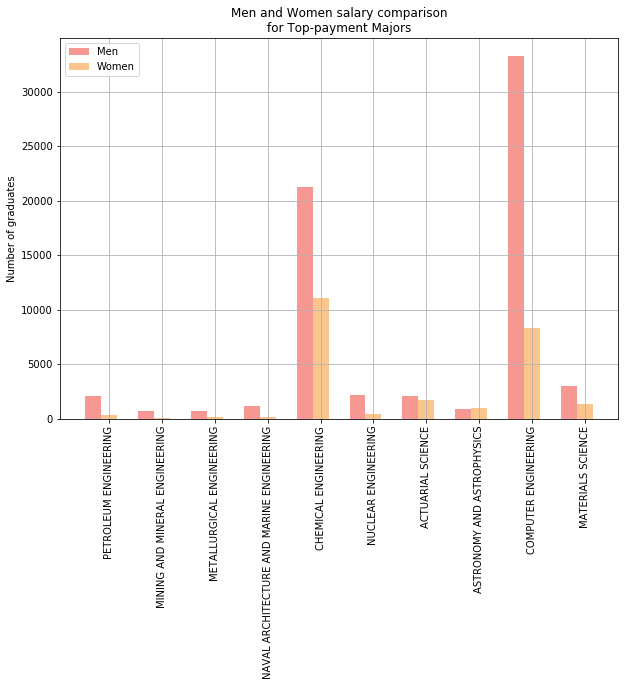

In [70]:
fig, ax = plt.subplots(figsize=(10,7))

pos = range(len(df_salary_top10['Men']))
width=0.3
max_ylim = max(df_salary_top10['Men'] + df_salary_top10['Women'])

ax.bar(pos,
       df_salary_top10['Men'],
      width,
      color='#EE3224',
      alpha=0.5
      )

ax.bar([p + width for p in pos],
       df_salary_top10['Women'],
      width,
      color='#F78F1E',
      alpha=0.5
      )

ax.set_title('Men and Women salary comparison\nfor Top-payment Majors')
ax.set_ylabel('Number of graduates')

ax.set_xticks([p + width for p in pos])
ax.set_xticklabels(df_salary_top10['Major'], rotation=90)

#ax.set_ylim(0, max_ylim)
##ax.set_xlim(min(pos)-width,max(pos)+width*2)

ax.legend(['Men','Women'], loc='upper left')
ax.grid()
plt.show()

#### Men-Women grouped barplots for Bottom 10 Majors

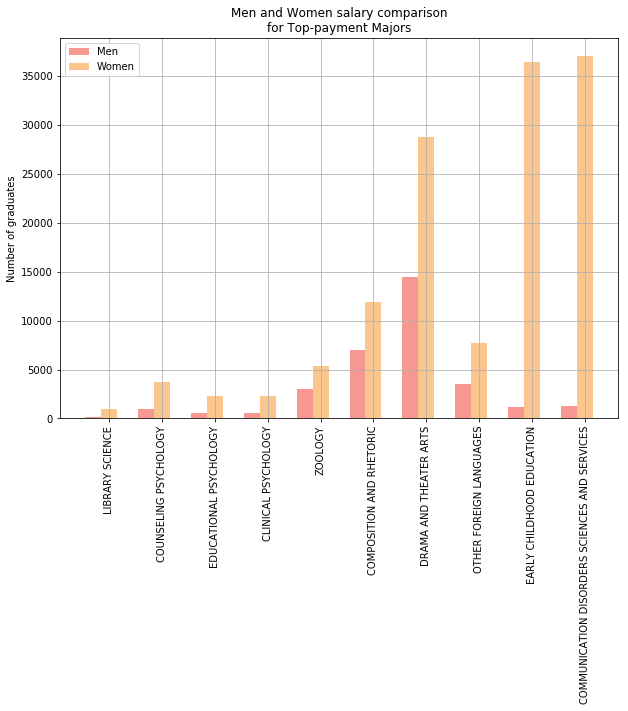

In [71]:
fig, ax = plt.subplots(figsize=(10,7))

pos = range(len(df_salary_bottom10['Men']))
width=0.3
max_ylim = max(df_salary_bottom10['Men'] + df_salary_bottom10['Women'])

ax.bar(pos,
       df_salary_bottom10['Men'],
      width,
      color='#EE3224',
      alpha=0.5
      )

ax.bar([p + width for p in pos],
       df_salary_bottom10['Women'],
      width,
      color='#F78F1E',
      alpha=0.5
      )

ax.set_title('Men and Women salary comparison\nfor Top-payment Majors')
ax.set_ylabel('Number of graduates')

ax.set_xticks([p + width for p in pos])
ax.set_xticklabels(df_salary_bottom10['Major'], rotation=90)

#ax.set_ylim(0, max_ylim)
##ax.set_xlim(min(pos)-width,max(pos)+width*2)

ax.legend(['Men','Women'], loc='upper left')
ax.grid()
plt.show()

### Median Salaries and Unemployment rate

Using a box plot explore the distributions of median salaries and unemployment rate.

In [ ]:
fig, ax = plt.subplots(figsize=(10,7))
ax.boxplot([recent_grads['Unemployment_rate']*100,
                df_salary_top['Unemployment_rate']*100,
                df_salary_bottom['Unemployment_rate']*100],
              showfliers=False)

ax.set_title('Unemployment Rate')
ax.set_ylabel('Percentage %')
#ax.set_xticks([1,2,3])
ax.set_xticklabels(['Overall','Top Majors','Bottom Majors']);
plt.grid(alpha=0.3)
plt.show()

#### Salaries

In [128]:
df_salary_top = recent_grads.sort_values('Median',ascending=False)[:10]
df_salary_bottom = recent_grads.sort_values('Median')[:10]

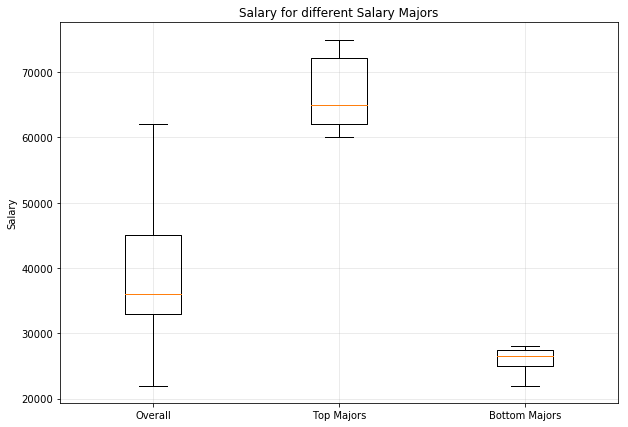

In [131]:
fig, ax = plt.subplots(figsize=(10,7))
ax.boxplot([recent_grads['Median'],
                df_salary_top['Median'],
                df_salary_bottom['Median']],
              showfliers=False)

ax.set_title('Salary for different Salary Majors')
ax.set_ylabel('Salary')
#ax.set_xticks([1,2,3])
ax.set_xticklabels(['Overall','Top Majors','Bottom Majors']);
plt.grid(alpha=0.3)
plt.show()

#### Unemployment Rate

In [128]:
df_salary_top = recent_grads.sort_values('Median',ascending=False)[:10]
df_salary_bottom = recent_grads.sort_values('Median')[:10]

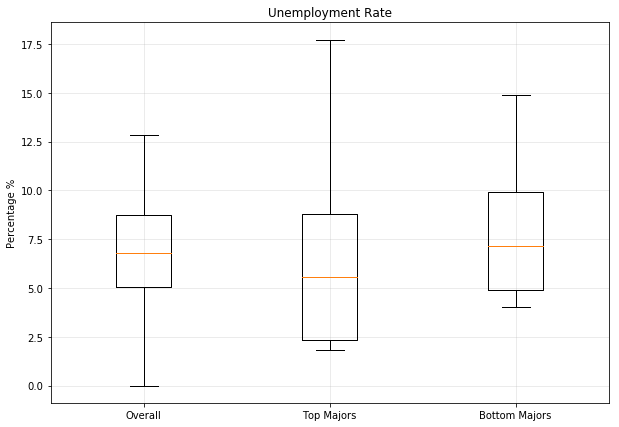

In [129]:
fig, ax = plt.subplots(figsize=(10,7))
ax.boxplot([recent_grads['Unemployment_rate']*100,
                df_salary_top['Unemployment_rate']*100,
                df_salary_bottom['Unemployment_rate']*100],
              showfliers=False)

ax.set_title('Unemployment Rate')
ax.set_ylabel('Percentage %')
#ax.set_xticks([1,2,3])
ax.set_xticklabels(['Overall','Top Majors','Bottom Majors']);
plt.grid(alpha=0.3)
plt.show()

### Findings on Salaries and Unemployment comparison
---

Top Majors have salaries that can be categorized as "flyers" for the overall group.

Bottom Major's Salaries constitute about 15 percentile of Overall Salary Body

---
Unemployment Rate for Bottom-salary Majors is overall the higher than that in Top-salary group or overall unemployment rate.

### Hexagonal bin plot to visualization

Use a hexagonal bin plot to visualize the columns that had dense scatter plots.

#### Sample size to Unemployment Rate

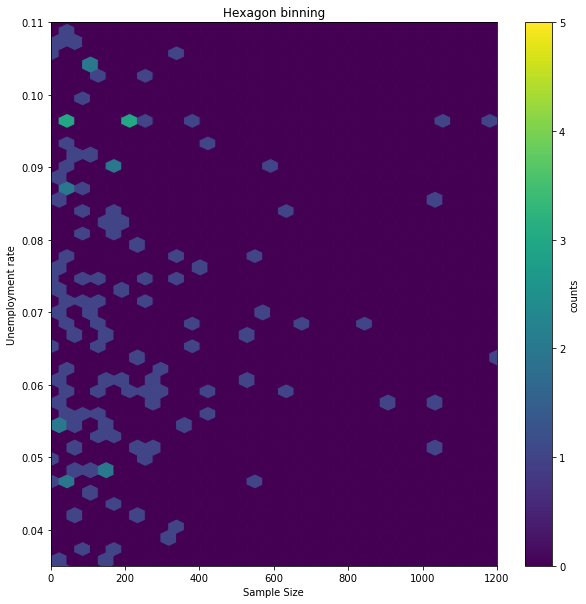

In [165]:
fig, ax = plt.subplots(figsize=(10,10))

sample_size=recent_grads['Sample_size']
unempl_rate=recent_grads['Unemployment_rate']

hb = ax.hexbin(sample_size, unempl_rate)
ax.set_title("Hexagon binning")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('counts')

ax.set_xlabel('Sample Size')
ax.set_ylabel('Unemployment rate')

ax.set_xlim(0,1200)
ax.set_ylim(0.035,0.110)
#ax.set_aspect('datalim')
plt.show()

#### Sample size to Median Salary

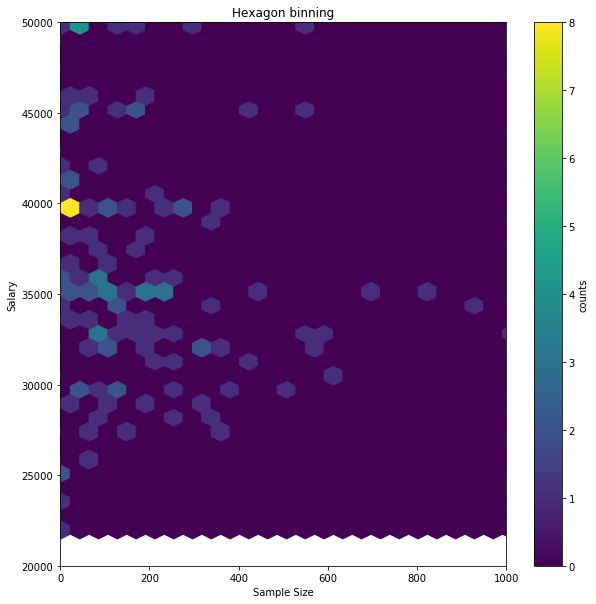

In [166]:
fig, ax = plt.subplots(figsize=(10,10))

sample_size=recent_grads['Sample_size']
unempl_rate=recent_grads['Median']

hb = ax.hexbin(sample_size, unempl_rate)
ax.set_title("Hexagon binning")
cb = fig.colorbar(hb, ax=ax)
cb.set_label('counts')

ax.set_xlabel('Sample Size')
ax.set_ylabel('Salary')

ax.set_xlim(0,1000)
ax.set_ylim(20000,50000)
plt.show()

### Findings

---
Unemployment rate aggregates around 4 to 10 percentage for most groups.

---
Salaries aggregate mostly at the level of 30-45k for most groups.